In [1]:
import pandas as pd 
import wrangle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error



In [2]:
# 1 load the zillow dataset 
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA


In [4]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                             object
dtype: object

In [5]:
train, validate, test = wrangle.split_zillow_data(df)

In [33]:
print(train.shape, validate.shape, test.shape)

(1340532, 13) (335134, 7) (418917, 7)


### 2.) fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft

In [6]:
x= pd.DataFrame(train.calculatedfinishedsquarefeet)
y = train.taxvaluedollarcnt


In [36]:
baseline = train.taxvaluedollarcnt.mean()
baseline

398761.06098026753

In [37]:
train['yhat_baseline'] = yhat_baseline = train.taxvaluedollarcnt.mean()
train.yhat_baseline.shape

(1340532,)

In [8]:
model = LinearRegression().fit(x,  y)
train['yhat'] = model.predict(x)

In [9]:
train['yhat'] = model.predict(x)

In [10]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat_baseline,yhat
2019113,3,2.0,1651,272534,1945,3310.51,LA,398761.06098,373311.251926
507360,5,4.0,3390,265241,1973,3534.86,LA,398761.06098,674970.088729
1074309,4,2.0,1697,438370,1959,5179.76,Orange,398761.06098,381290.726620
750390,3,1.0,1392,68118,1958,1164.46,LA,398761.06098,328383.340062
32080,3,2.0,1681,62796,1954,1022.02,Orange,398761.06098,378515.257161


### 3.) plot the residuals for the linear regression model that you made

In [35]:
train['residual'] =y - train.yhat
train['residual_baseline'] = train.yhat_baseline - y

In [12]:
train.calculatedfinishedsquarefeet.shape

(1340532,)

In [13]:
train.head(3)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat_baseline,yhat,residual,residual_baseline
2019113,3,2.0,1651,272534,1945,3310.51,LA,398761.06098,373311.251926,100777.251926,126227.06098
507360,5,4.0,3390,265241,1973,3534.86,LA,398761.06098,674970.088729,409729.088729,133520.06098
1074309,4,2.0,1697,438370,1959,5179.76,Orange,398761.06098,381290.726620,-57079.273380,-39608.93902


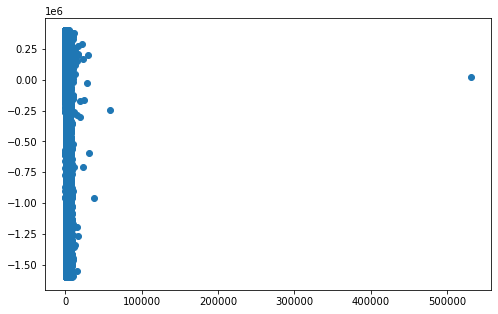

In [14]:
plt.figure(figsize = (8,5))
plt.scatter(train.calculatedfinishedsquarefeet , train.residual_baseline)
plt.show()

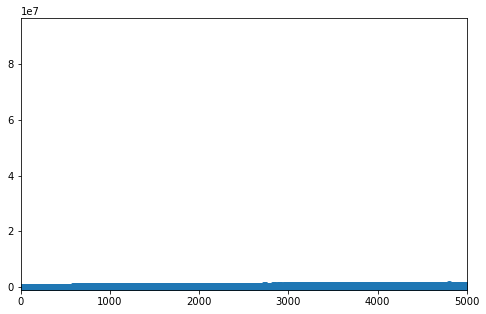

In [15]:
plt.figure(figsize = (8,5))
plt.scatter(train.calculatedfinishedsquarefeet, train.residual)
plt.xlim(0,5000)
plt.ylim(-1_000_000)
plt.show()

### 4 calculate the sum of squared errors, explained sum of squares, total sum of squares, meansquared error, and root mean squared error for your model. 

In [16]:
train['residual^2'] = train.residual ** 2
train['residual_baseline^2'] = train.residual_baseline ** 2 
train.head(2)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,yhat_baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
2019113,3,2.0,1651,272534,1945,3310.51,LA,398761.06098,373311.251926,100777.251926,126227.06098,1.015605e+10,1.593327e+10
507360,5,4.0,3390,265241,1973,3534.86,LA,398761.06098,674970.088729,409729.088729,133520.06098,1.678779e+11,1.782761e+10


In [39]:
# SUM OF SQUARED ERRORS
SSE = sum(train['residual^2'])
SSE_baseline = sum(train['residual_baseline^2'])

print (" SSE =", SSE)
print( "SSE baseline = " , SSE_baseline)

 SSE = 9.82203969375538e+16
SSE baseline =  1.3196532072001851e+17


In [25]:
# explained sum of squares
ESS = sum((train.yhat - y.mean()) ** 2)
print(' ESS = ', ESS)

 ESS =  3.374492378244865e+16


In [32]:
# TOTAL SUM OF SQUARES
SSE = train_eval[train_eval.metric=='SSE']['model_error']
TSS = ESS + SSE
print("ESS = ", ESS)
print("SSE = ", SSE[0])
print("TSS = ", TSS[0])


ESS =  3.374492378244865e+16
SSE =  9.82203969375538e+16
TSS =  1.3196532072000243e+17


In [18]:
# MEAN SQUARED ERROR
MSE = SSE/len(train)
MSE_baseline = SSE_baseline/len(train)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)


MSE =  73269714514.50156
MSE baseline =  98442499485.29279


In [19]:
# ROOT MEAN SQUARED ERROR
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)


RMSE =  270683.79063863715
RMSE baseline =  313755.4772195902


### 5 

In [21]:
SSE2 = mean_squared_error(y, train.yhat)*len(train)
SSE2_baseline = mean_squared_error(y, train.yhat_baseline)*len(train)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2_baseline) 


SSE manual == SSE sklearn:  False
SSE manual - baseline == SSE sklearn - baseline:  False


In [28]:
 train_eval = pd.DataFrame(np.array(['SSE', 'MSE', 'RMSE']), columns = ['metric'])

In [40]:
train_eval['model_error'] = np.array([SSE, MSE, RMSE])

In [41]:
train.calculatedfinishedsquarefeet.max()

531118